In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression,LassoCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif,VarianceThreshold,RFECV
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import f1_score,fbeta_score,make_scorer,roc_curve
import warnings
from sklearn.metrics import f1_score,recall_score,confusion_matrix,classification_report,roc_auc_score
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
warnings.filterwarnings("ignore")
from keras import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD,NMF
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [5]:
df = pd.read_csv("C:/Users/ozcan/OneDrive/Masaüstü/Complete-Python-3-Bootcamp-master/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Telco-Customer-Churn.csv")

## PREPROCESSING

In [6]:
df=df[df["TotalCharges"]!=" "]
df['TotalCharges'] = df['TotalCharges'].astype("float")
df["SeniorCitizen"]=df["SeniorCitizen"].astype("object")
df.drop_duplicates(inplace=True)
df=df.drop("customerID",axis=1)

In [7]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
df= pd.get_dummies(df, drop_first= True)

X = df.drop(["Churn"],axis = 1)

y = df["Churn"]

In [8]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
cols = df.columns
num_cols = ["MonthlyCharges","TotalCharges","tenure"]
cat_cols= list(set(cols) - set(num_cols))

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [11]:
models = [
    ("LogisticRegression",LogisticRegression(random_state=42)),
    ("AdaBoostClassifier",AdaBoostClassifier(random_state=42)),
    ("RandomForestClassifier",RandomForestClassifier(random_state=42)),
    ("DecisionTreeClassifier",DecisionTreeClassifier(random_state=42)),
    ("Support Vector Classifier",SVC(random_state=42)),
    ("Lightgbm",LGBMClassifier(random_state=42)),
    ("CatBoost",CatBoostClassifier(random_state=42)),
    ("GradientBoosting",GradientBoostingClassifier(random_state=42)),
    ("XGBClassifier",XGBClassifier(random_state=42))
    
]
for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    recall=f1_score(y_test,y_pred)
    print(f"{name}:{recall:.4f}")

LogisticRegression:0.5803
AdaBoostClassifier:0.5853
RandomForestClassifier:0.5442
DecisionTreeClassifier:0.5117
Support Vector Classifier:0.5510
Lightgbm:0.5714
Learning rate set to 0.020346
0:	learn: 0.6779840	total: 147ms	remaining: 2m 26s
1:	learn: 0.6649889	total: 150ms	remaining: 1m 15s
2:	learn: 0.6535494	total: 154ms	remaining: 51s
3:	learn: 0.6408513	total: 157ms	remaining: 39.1s
4:	learn: 0.6294526	total: 160ms	remaining: 31.8s
5:	learn: 0.6189552	total: 163ms	remaining: 27s
6:	learn: 0.6093718	total: 166ms	remaining: 23.5s
7:	learn: 0.5999728	total: 169ms	remaining: 21s
8:	learn: 0.5905054	total: 172ms	remaining: 19s
9:	learn: 0.5811576	total: 175ms	remaining: 17.3s
10:	learn: 0.5726223	total: 178ms	remaining: 16s
11:	learn: 0.5636087	total: 181ms	remaining: 14.9s
12:	learn: 0.5562819	total: 184ms	remaining: 14s
13:	learn: 0.5501664	total: 187ms	remaining: 13.2s
14:	learn: 0.5444831	total: 190ms	remaining: 12.5s
15:	learn: 0.5377084	total: 193ms	remaining: 11.9s
16:	learn: 0.

## Feature Selection

#### Principal Component Analysis

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_trainpca = pca.fit_transform(X_train)
X_testpca=pca.transform(X_test)

In [13]:
print(f"Number of features decreased from {X_train.shape[1]} to {X_trainpca.shape[1]}.")

Number of features decreased from 30 to 10.


#### Chi-squared test

In [14]:
# Perform chi-squared test
best_features = SelectKBest(score_func=chi2, k=10)
selector = best_features.fit(X_train, y_train)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_featureschi2 = X.columns[feature_indices].tolist()
X_trainchi2=X_train[selected_featureschi2]
X_testchi2=X_test[selected_featureschi2]

In [15]:
print(f"Number of features decreased from {X_train.shape[1]} to {X_testchi2.shape[1]}.")

Number of features decreased from 30 to 10.


#### Recursive feature elimination

In [16]:
from sklearn.feature_selection import RFE

rfc = RandomForestClassifier()
rfe = RFE(estimator=rfc, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)
selected_featuresrfe = X_train.columns[rfe.support_]
X_trainrfe=X_train[selected_featuresrfe]
X_testrfe=X_test[selected_featuresrfe]

In [17]:
print(f"Number of features decreased from {X_train.shape[1]} to {X_trainrfe.shape[1]}.")

Number of features decreased from 30 to 10.


#### Correlation-based feature selection

In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Identify the features that are highly correlated with the target variable
target_corr = corr_matrix["Churn"].sort_values(ascending=False)

# Select the top features based on the correlation coefficient
selected_featurescor = list(target_corr[(target_corr > 0.2) | (target_corr < -0.2)].drop("Churn").index)
X_traincor=X_train[selected_featurescor]
X_testcor=X_test[selected_featurescor]

In [19]:
print(f"Number of features decreased from {X_train.shape[1]} to {X_testcor.shape[1]}.")

Number of features decreased from 30 to 11.


#### Tree-based feature selection

In [20]:
# Create a tree-based classifier object
clf = ExtraTreesClassifier()

# Fit the classifier on the input features and target variable
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Get the indices of the sorted feature importances
sorted_indices = importances.argsort()[::-1]

# Select the top K features
K = 10
selected_indices = sorted_indices[:K]

# Get the names of the selected features
selected_featurestre = X.columns[selected_indices].tolist()
X_traintre=X_train[selected_featurestre]
X_testtre=X_test[selected_featurestre]

In [21]:
print(f"Number of features decreased from {X_train.shape[1]} to {X_testtre.shape[1]}.")

Number of features decreased from 30 to 10.


#### Singular Value Decomposition (SVD)

In [22]:
n_components = 10
svd = TruncatedSVD(n_components=n_components)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [23]:
print(f"Number of features decreased from {X_train.shape[1]} to {X_testtre.shape[1]}.")

Number of features decreased from 30 to 10.


In [24]:
# Define the ensemble models to evaluate
selections = [
    ('Principal Component Analysis', X_trainpca,X_testpca),
    ('Chi-Squared Test', X_trainchi2,X_testchi2),
    ("Recursive Feature Elimination",X_trainrfe,X_testrfe),
    ("Correlation-based Feature Selection",X_traincor,X_testcor),
    ("Tree-based Feature Selection",X_traintre,X_testtre),
    ("Singular Value Decomposition(SVD)",X_train_svd,X_test_svd),
    
]

# Evaluate the models using cross-validation and f1-score
for name, train, test in selections:
    model=AdaBoostClassifier(random_state=42)
    model.fit(train,y_train)
    y_pred=model.predict(test)
    fbeta=fbeta_score(y_test,y_pred,beta=2)
    
    print(f"{name} Fbeta-Score: {fbeta:.4f}")

Principal Component Analysis Fbeta-Score: 0.5022
Chi-Squared Test Fbeta-Score: 0.4756
Recursive Feature Elimination Fbeta-Score: 0.5410
Correlation-based Feature Selection Fbeta-Score: 0.4883
Tree-based Feature Selection Fbeta-Score: 0.5244
Singular Value Decomposition(SVD) Fbeta-Score: 0.5385


In [25]:
X_train=X_trainrfe
X_test=X_testrfe

## Sampling

In [26]:
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} customer)\nPercentage of customer did not churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} customer)')

Percentage of Churn:  26.58 %  --> (1869 customer)
Percentage of customer did not churn: 73.42  %  --> (5163 customer)


#### ADASYN

In [27]:
from imblearn.over_sampling import ADASYN

In [28]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [29]:
print("Class distribution after undersampling:", np.bincount(y_train_adasyn))

Class distribution after undersampling: [3614 3660]


#### SMOTE (Synthetic Minority Over-sampling Technique)

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_trainsmo, y_trainsmo = smote.fit_resample(X_train, y_train)

print("Class distribution after undersampling:", np.bincount(y_train))

Class distribution after undersampling: [3614 1308]


#### Random Oversampling

In [31]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_trainov, y_trainov = ros.fit_resample(X_train, y_train)

print("Class distribution after undersampling:", np.bincount(y_train))

Class distribution after undersampling: [3614 1308]


#### Random Undersampling

In [32]:
from imblearn.under_sampling import RandomUnderSampler

# Define the random undersampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the training data
X_trainun, y_trainun = rus.fit_resample(X_train, y_train)

print("Class distribution after undersampling:", np.bincount(y_trainun))

Class distribution after undersampling: [1308 1308]


In [33]:
# Define the ensemble models to evaluate
selections = [
    ('ADASYN', X_train_adasyn,y_train_adasyn),
    ('SMOTE', X_trainsmo,y_trainsmo),
    ("Random Oversampling",X_trainov,y_trainov),
    ("Random Undersampling",X_trainun,y_trainun)
]

# Evaluate the models using cross-validation and f1-score
for name, xtrain,ytrain in selections:
    model=AdaBoostClassifier(random_state=42)
    model.fit(xtrain,ytrain)
    y_pred=model.predict(X_test)
    fbeta=fbeta_score(y_test,y_pred,beta=2)
    
    print(f"{name} Fbeta-Score: {fbeta:.4f}")

ADASYN Fbeta-Score: 0.7331
SMOTE Fbeta-Score: 0.7199
Random Oversampling Fbeta-Score: 0.7127
Random Undersampling Fbeta-Score: 0.7111


In [34]:
X_train=X_trainsmo
y_train=y_trainsmo

## Machine Learning Algorithms

In [35]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scorer=make_scorer(fbeta_score,beta = 2)

In [68]:
lgbm=LGBMClassifier(random_state=42,scale_pos_weight=5)

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid = GridSearchCV(lgbm, param_grid, cv=5, scoring=scorer,n_jobs=-1)

grid.fit(X_train, y_train)
lgbm = grid.best_estimator_
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Fbeta score: 0.7312
Avg precision Score: 0.6400
RocAuc Score: 0.8307
Recall Score: 0.9358


In [69]:
grid.best_estimator_

LGBMClassifier(learning_rate=0.05, max_depth=7, random_state=42,
               scale_pos_weight=5, subsample=0.8)

In [70]:
grid.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 100,
 'subsample': 0.8}

Fbeta score: 0.7366
Avg precision Score: 0.4005
RocAuc Score: 0.7222
Recall Score: 0.9162

In [86]:
catboost = CatBoostClassifier(verbose=False,random_state=42,scale_pos_weight=5)

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0]
}

grid = GridSearchCV(catboost, param_grid, cv=5, scoring=scorer,n_jobs=-1)

grid.fit(X_train, y_train)
catboost = grid.best_estimator_
y_pred = catboost.predict(X_test)
y_pred_proba = catboost.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Fbeta score: 0.7332
Avg precision Score: 0.6437
RocAuc Score: 0.8353
Recall Score: 0.9394


In [87]:
grid.best_params_

{'colsample_bylevel': 0.8,
 'depth': 7,
 'iterations': 200,
 'learning_rate': 0.05,
 'subsample': 1.0}

In [43]:
# Define hyperparameter grid
param_grid = {'C': [0.001, 0.1, 1, 100],
'penalty': ['l1', 'l2']}
# Create an instance of logistic regression
logreg = LogisticRegression(random_state=42)


# Create an instance of GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5, scoring=scorer)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

logreg=grid.best_estimator_
# Print the best hyperparameters and score
print("Best hyperparameters: ", grid.best_params_)

# predict the target values for the test data
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Best hyperparameters:  {'C': 100, 'penalty': 'l2'}
Fbeta score: 0.7289
Avg precision Score: 0.6396
RocAuc Score: 0.8288
Recall Score: 0.8253


#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to test
param_grid = {'n_estimators': [100, 200, 400],
              'max_depth': [None, 10, 20,40],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation to find the best hyperparameters
grid = GridSearchCV(rf_model, param_grid, cv=5, scoring=scorer,n_jobs=-1)
grid.fit(X_train, y_train)

rf=grid.best_estimator_

# predict the target values for the test data
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Fbeta score: 0.6840
Avg precision Score: 0.6305
RocAuc Score: 0.8307
Recall Score: 0.7415


In [47]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

#### Support Vector Machines (SVMs)

In [48]:
from sklearn.svm import SVC

# Define the SVM model
svm = SVC(probability=True)

# Define the hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01,0.1, 1], 'kernel': ['linear', 'rbf']}

# Perform a grid search over the hyperparameters
grid = GridSearchCV(svm, param_grid, cv=5, scoring=scorer,n_jobs=-1)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

svm=grid.best_estimator_
# Print the best hyperparameters and score
print("Best hyperparameters: ", grid.best_params_)

# predict the target values for the test data
y_pred = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Best hyperparameters:  {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Fbeta score: 0.7128
Avg precision Score: 0.6381
RocAuc Score: 0.8241
Recall Score: 0.8717


In [72]:
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for the GradientBoostingClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GradientBoostingClassifier model with different hyperparameters
dt = DecisionTreeClassifier(random_state=42)
# Perform grid search cross-validation to find the best hyperparameters
grid = GridSearchCV(dt, param_grid, cv=5, scoring=scorer,n_jobs=-1)
grid.fit(X_train, y_train)

gb=grid.best_estimator_

# predict the target values for the test data
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Fbeta score: 0.6840
Avg precision Score: 0.6035
RocAuc Score: 0.8099
Recall Score: 0.7594


In [73]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### ENSEMBLE METHODS

#### Ensemble of RandomForest and GradientBoosting

In [49]:
# Define the hyperparameters for the Random Forest
rf_params = {
    'n_estimators': [50,100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

# Define the hyperparameters for the Gradient Boosting
gb_params = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [5, 10]
}

# Create the individual models with different hyperparameters
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5,scoring=scorer)

gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=5,scoring=scorer)

# Create the ensemble method
ensemble = VotingClassifier([('rf', rf_grid), ('gb', gb_grid)], voting='soft')

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('ensemble', ensemble)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data using recall score
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Fbeta score: 0.6640
Avg precision Score: 0.6224
RocAuc Score: 0.8223
Recall Score: 0.7166


In [54]:
pipeline

Pipeline(steps=[('ensemble',
                 VotingClassifier(estimators=[('rf',
                                               GridSearchCV(cv=5,
                                                            estimator=RandomForestClassifier(random_state=42),
                                                            param_grid={'max_depth': [5,
                                                                                      10],
                                                                        'min_samples_split': [2,
                                                                                              5],
                                                                        'n_estimators': [50,
                                                                                         100,
                                                                                         200]},
                                                            scoring=make_scorer(fbeta_score, beta=2))),
                                              ('gb',
                                               GridSearchCV(cv=5,
                                                            estimator=GradientBoostingClassifier(random_state=42),
                                                            param_grid={'learning_rate': [0.1,
                                                                                          0.01],
                                                                        'max_depth': [5,
                                                                                      10],
                                                                        'n_estimators': [50,
                                                                                         100,
                                                                                         200]},
                                                            scoring=make_scorer(fbeta_score, beta=2)))],
                                  voting='soft'))])

#### AdaBoostClassifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Define the base estimator
estimator = DecisionTreeClassifier()

# Define the Adaboost classifier with the base estimator
ada = AdaBoostClassifier(base_estimator=estimator)

# Define the hyperparameters for the AdaBoostClassifier
param_grid = {
    'base_estimator__max_depth': [1,2,4],
    "base_estimator__criterion":["gini","entropy"],
    "base_estimator__max_features": ["auto","sqrt","log2"],
    'n_estimators': [50, 100, 200],
    'base_estimator__max_leaf_nodes':[3,4,6]
}
# Create the AdaBoostClassifier model with different hyperparameters
grid = GridSearchCV(ada, param_grid,cv=5, scoring=scorer,n_jobs=-1)

# Fit the pipeline to the training data
grid.fit(X_train, y_train)

# Get the best estimator found by the grid search
adaboost = grid.best_estimator_


# predict the target values for the test data
y_pred = adaboost.predict(X_test)
y_pred_proba = adaboost.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Fbeta score: 0.7214
Avg precision Score: 0.6404
RocAuc Score: 0.8372
Recall Score: 0.8057


In [66]:
grid.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': 6,
 'n_estimators': 50}

#### Gradient Boosting Classifier

In [55]:
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for the GradientBoostingClassifier
param_grid = {
    'max_depth': [3, 4,5],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2,3, 4],
    'min_samples_leaf': [1, 2, 3],
    "max_features":["log2","sqrt"]
}

# Create the GradientBoostingClassifier model with different hyperparameters
model = GradientBoostingClassifier(random_state=42)
# Perform grid search cross-validation to find the best hyperparameters
grid = GridSearchCV(model, param_grid, cv=5, scoring=scorer,n_jobs=-1)
grid.fit(X_train, y_train)

gb=grid.best_estimator_

# predict the target values for the test data
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Fbeta score: 0.6622
Avg precision Score: 0.6300
RocAuc Score: 0.8246
Recall Score: 0.7094


#### XGBoost Classifier

In [74]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Define the hyperparameters for the XGBoost Classifier
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

# Create the XGBoost Classifier model with different hyperparameters
model = xgb.XGBClassifier(random_state=42)
grid = GridSearchCV(model, param_grid, cv=5, scoring=scorer,n_jobs=-1)
grid.fit(X_train, y_train)

xgb=grid.best_estimator_

# predict the target values for the test data
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]

print(f"Fbeta score: {fbeta_score(y_test,y_pred,beta=2):.4f}")
print(f"Avg precision Score: {average_precision_score(y_test, y_pred_proba):.4f}")
print(f"RocAuc Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.4f}")

Fbeta score: 0.7161
Avg precision Score: 0.5964
RocAuc Score: 0.8173
Recall Score: 0.8164


In [77]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay


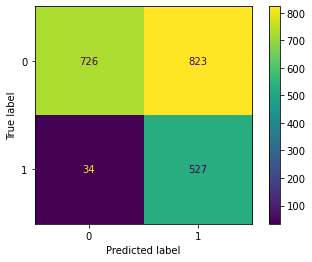

In [60]:
ConfusionMatrixDisplay.from_estimator(catboost, X_test, y_test)

Text(0.5, 1.0, 'Feature Importance')

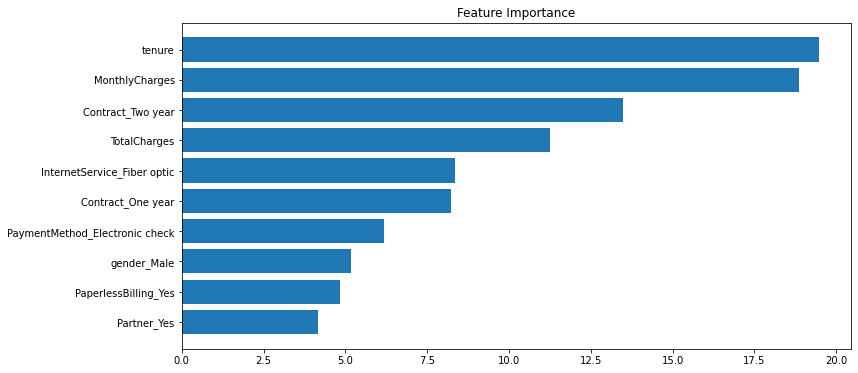

In [75]:
feature_importance = catboost.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [68]:
def graphs(model,X_test,y_test):
     plt.figure(figsize=(10,6))
     y_pred_proba = model.predict_proba(X_test)[:,1]

     #prc curve
     plt.subplot(1, 2, 1)
     precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
     auprc = round(average_precision_score(y_test, y_pred_proba),4)
    
     plt.plot(precision,recall, label ="AP: " + str(auprc))
     plt.legend(loc=3)
     plt.title("Precision Recall Curve")
     plt.ylabel("Precision")
     plt.xlabel("Recall")

     #roc curve
     y_pred_proba = model.predict_proba(X_test)[:,1]
     fpr,tpr,_ = roc_curve(y_test,y_pred_proba)
     auc = round(roc_auc_score(y_test, y_pred_proba),4)
     plt.subplot(1, 2, 2)
     plt.plot(fpr,tpr,label ="AUC: "+str(auc))
     plt.ylabel('True Positive Rate')
     plt.xlabel('False Positive Rate')
     plt.legend(loc=4)
     plt.title("ROC Curve")

     
     plt.show()

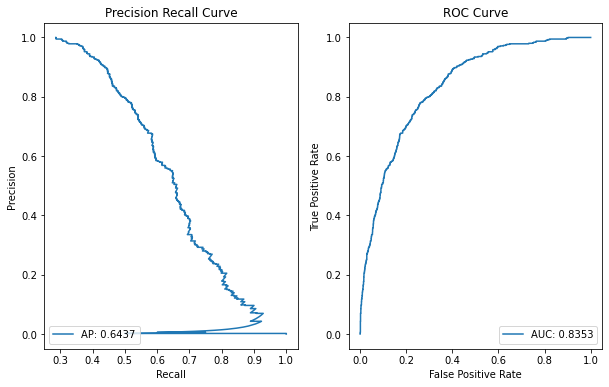

In [69]:
graphs(catboost,X_test,y_test)